## Waste Management using CNN Model

pip install opencv-python

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob
import warnings
warnings.filterwarnings('ignore')

 If you have downloaded the dataset in your local machine then use this code

In [ ]:
train_path = "dataset/TRAIN"
test_path = "dataset/TEST"
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
        print(img_array)
data = pd.DataFrame({'image':x_data, 'label':y_data})

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:20<00:00, 21.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


**If you download the dataset from kaggle then use this procedure**

In [4]:
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

x_data = []
y_data = []

for category in glob(train_path + '/*'):
    label = category.split('/')[-1]
    image_files = glob(category + '/**/*.*', recursive=True)

    for file in tqdm(image_files, desc=f"Processing {label}"):
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for supported formats
            img_array = cv2.imread(file)
            if img_array is not None:  # Ensure image is loaded correctly
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                x_data.append(img_array)
                y_data.append(label)
            else:
                print(f"Warning: Unable to load {file}")  # Debugging info for problematic files

# Creating the DataFrame
data = pd.DataFrame({'image': x_data, 'label': y_data})

# Display sample data
print(data.head())


Processing O: 100%|██████████| 12565/12565 [00:11<00:00, 1125.73it/s]


                                               image label
0  [[[255, 255, 255], [255, 255, 255], [255, 255,...     R
1  [[[179, 181, 193], [179, 181, 193], [180, 182,...     R
2  [[[188, 188, 188], [188, 188, 188], [188, 188,...     R
3  [[[255, 255, 255], [255, 255, 255], [255, 255,...     R
4  [[[247, 247, 247], [247, 247, 247], [247, 247,...     R


In [5]:
print(len(train_path))
data.shape

91


(22564, 2)

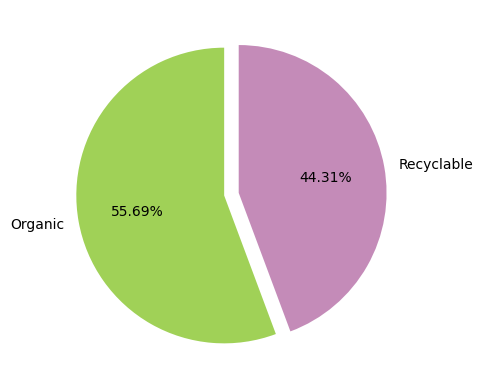

In [13]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%',
        colors = colors, startangle = 90,  explode=[0.05, 0.05])
plt.show()

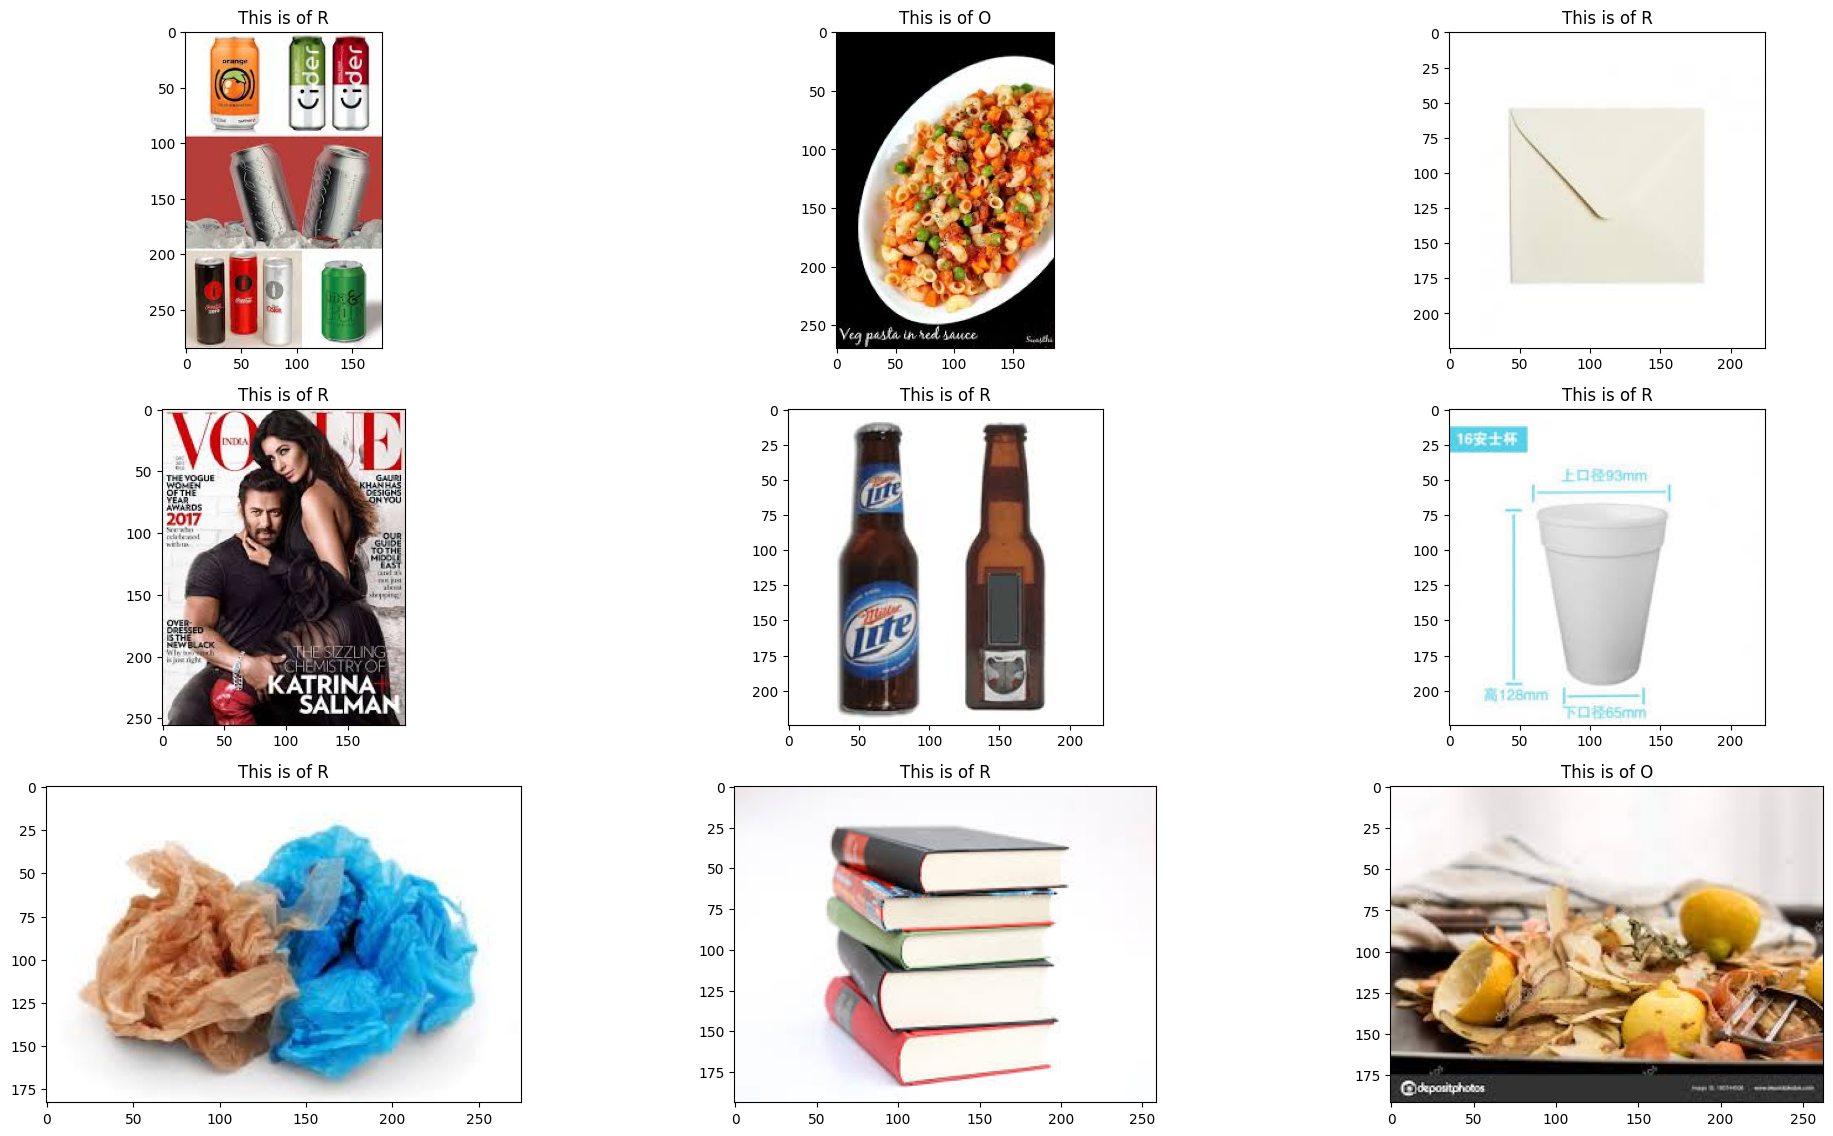

In [14]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

### CNN - Convolutional Neural Network

In [6]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 256

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
    subset='training'
)

validation_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
    subset='validation'
)


Found 22564 images belonging to 2 classes.
Found 2011 images belonging to 2 classes.
Found 502 images belonging to 2 classes.


In [11]:
print(len(train_generator))
print(len(test_generator))
print(len(validation_generator))

89
8
2


In [12]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 100s 833ms/step - accuracy: 0.6844 - loss: 0.7341 - val_accuracy: 0.8543 - val_loss: 0.3987
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 575ms/step - accuracy: 0.8237 - loss: 0.4326 - val_accuracy: 0.8633 - val_loss: 0.3808
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 566ms/step - accuracy: 0.8302 - loss: 0.4074 - val_accuracy: 0.8901 - val_loss: 0.3099
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 570ms/step - accuracy: 0.8551 - loss: 0.3591 - val_accuracy: 0.8722 - val_loss: 0.3220
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 54s 602ms/step - accuracy: 0.8691 - loss: 0.3266 - val_accuracy: 0.8742 - val_loss: 0.3442
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 52s 580ms/step - accuracy: 0.8821 - loss: 0.2970 - val_accuracy: 0.8866 - val_loss: 0.3046
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 53s 593ms/step - accuracy: 0.8929 - loss: 0.2752 - val_accuracy: 0.8787 - val_loss: 0.3094
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 52s 581ms/step - accuracy: 0.9062 - loss: 0.2414 - val_acc

In [15]:
y_predi = model.predict(validation_generator)

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 7s/step


In [16]:
model.evaluate(test_generator)

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 428ms/step - accuracy: 0.8769 - loss: 0.3206


[0.318925678730011, 0.8841372728347778]

Here

In [19]:
model.evaluate(validation_generator)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step - accuracy: 0.9406 - loss: 0.1381


[0.14323580265045166, 0.9402390718460083]